In [1]:
import tools
images, data, target = tools.load_data()

In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=10)

In [3]:
scaler, scaled_X_train = tools.scale(X_train)
pca, reduced_X_train = tools.reduce(scaled_X_train, 40)

In [4]:
from sklearn.model_selection import GridSearchCV
params = {'hidden_layer_sizes': [pow(10,x) for x in range(4)], 'alpha': [0.01,0.001, 0.0001, 0.00001]}

cv = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=10), cv=10, n_jobs=-1)
cv.fit(reduced_X_train, y_train)

print("Train accuracy:", cv.score(reduced_X_train, y_train))

scaled_X_test = scaler.transform(X_test)
reduced_X_test = pca.transform(scaled_X_test)
print("Test accuracy:", cv.score(reduced_X_test, y_test))

print(cv.best_params_)

Train accuracy: 1.0
Test accuracy: 0.8432888264230499
{'alpha': 0.01, 'hidden_layer_sizes': 1000}


In [5]:
clf = MLPClassifier(hidden_layer_sizes=1000,alpha=0.01, max_iter=1000)
clf.fit(reduced_X_train, y_train)
print("Train accuracy:",clf.score(reduced_X_train, y_train))

scaled_X_test = scaler.transform(X_test)
reduced_X_test = pca.transform(scaled_X_test)
print("Test accuracy:",clf.score(reduced_X_test, y_test))

Train accuracy: 1.0
Test accuracy: 0.8369641602248771


In [6]:
bad_images = []
for i in range(len(X_test)):
    if clf.predict([reduced_X_test[i]])[0] != y_test[i]:
        bad_images.append(i)
print("Wrongly classified images:",bad_images)

Wrongly classified images: [0, 2, 7, 8, 10, 11, 24, 25, 57, 79, 81, 86, 88, 90, 94, 101, 107, 108, 116, 117, 118, 121, 134, 135, 137, 155, 160, 162, 167, 168, 169, 178, 188, 194, 195, 202, 204, 207, 208, 209, 215, 220, 221, 228, 253, 254, 264, 267, 270, 272, 276, 280, 291, 298, 318, 325, 331, 333, 334, 337, 349, 351, 354, 356, 359, 364, 385, 387, 388, 396, 418, 424, 434, 444, 445, 450, 451, 454, 466, 467, 490, 498, 503, 516, 520, 521, 538, 539, 541, 550, 554, 561, 564, 569, 575, 584, 589, 591, 599, 611, 619, 623, 641, 648, 653, 657, 659, 673, 677, 683, 685, 687, 689, 702, 710, 714, 721, 726, 737, 738, 745, 753, 754, 756, 758, 764, 774, 784, 790, 811, 831, 832, 848, 849, 856, 864, 865, 874, 875, 876, 877, 878, 883, 895, 896, 897, 898, 904, 909, 916, 917, 918, 921, 927, 941, 949, 951, 968, 977, 979, 997, 1005, 1013, 1014, 1016, 1018, 1019, 1026, 1030, 1038, 1039, 1041, 1043, 1063, 1086, 1088, 1106, 1118, 1120, 1121, 1129, 1130, 1133, 1139, 1143, 1164, 1166, 1167, 1195, 1197, 1208, 1212, 

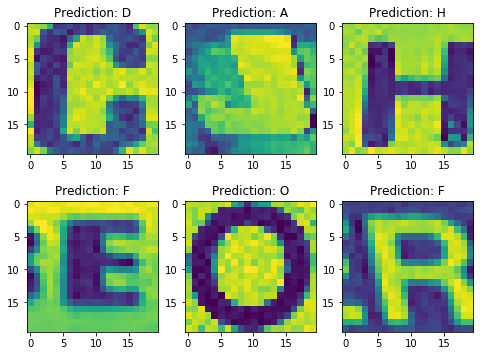

In [7]:
import matplotlib.pyplot as plt
import numpy as np
X_test = [np.reshape(X_test[i], [20,20]) for i in range(len(X_test))]
fig, axs = plt.subplots(2,3, figsize = (8,6))
example_images = [0, 101, 300, 619, 1000, 1212]
img = example_images[0]

pred = clf.predict([reduced_X_test[img]])
axs[0,0].set_title('Prediction: ' + pred[0].capitalize())
axs[0,0].imshow(X_test[img])

img = example_images[1]
pred = clf.predict([reduced_X_test[img]])
axs[0,1].set_title('Prediction: ' + pred[0].capitalize())
axs[0,1].imshow(X_test[img])

img = example_images[2]
pred = clf.predict([reduced_X_test[img]])
axs[0,2].set_title('Prediction: ' + pred[0].capitalize())
axs[0,2].imshow(X_test[img])

img = example_images[3] 
pred = clf.predict([reduced_X_test[img]])
axs[1,0].set_title('Prediction: ' + pred[0].capitalize())
axs[1,0].imshow(X_test[img])

img = example_images[4]
pred = clf.predict([reduced_X_test[img]])
axs[1,1].set_title('Prediction: ' + pred[0].capitalize())
axs[1,1].imshow(X_test[img])

img = example_images[5]
pred = clf.predict([reduced_X_test[img]])
axs[1,2].set_title('Prediction: ' + pred[0].capitalize())
axs[1,2].imshow(X_test[img])

plt.show()

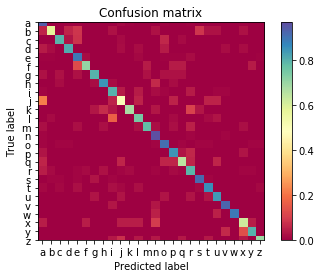

In [9]:
tools.plot_confusion_matrix(y_test, clf.predict(reduced_X_test), clf.classes_, "Confusion matrix")